In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install git+https://github.com/m-bain/whisperx.git@v3
#!pip install ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/m-bain/whisperx.git to /tmp/pip-req-build-vlclv9dx
  Running command git clone --filter=blob:none --quiet https://github.com/m-bain/whisperx.git /tmp/pip-req-build-vlclv9dx
  Resolved https://github.com/m-bain/whisperx.git to commit 0c84c26d9272fd8dc41af7945b8e9ee6a8820462
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/pyannote/pyannote-audio (to revision 11b56a137a578db9335efc00298f6ec1932e6317) to /tmp/pip-install-rcrk3dv4/pyannote-audio_d26a2635bad643879de6cb0ba7ec29f7
  Running command git clone --filter=blob:none --quiet https://github.com/pyannote/pyannote-audio /tmp/pip-install-rcrk3dv4/pyannote-audio_d26a2635bad643879de6cb0ba7ec29f7
  Running command git rev-parse -q --verify 'sha^11b56a137a578db9335efc00298f6ec1932e6317'
  Running command git fetch -q https://github.com/pyannote/pyannote-audio 11b56a137a578db9335efc00298f6ec1932

In [ ]:
import cv2
import numpy as np
# from ultralytics import YOLO
import whisperx
import os
from moviepy.editor import *
from google.colab.patches import cv2_imshow


RuntimeError: ignored

In [ ]:
!unset LD_LIBRARY_PATH

In [ ]:
from difflib import SequenceMatcher
device = "cuda"
compute_type = "float16"
whisper_model = whisperx.load_model("large-v2", device, compute_type=compute_type)

No language specified, language will be first be detected for each audio file (increases inference time).


100%|█████████████████████████████████████| 16.9M/16.9M [00:01<00:00, 10.7MiB/s]
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../root/.cache/torch/whisperx-vad-segmentation.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.0+cu118. Bad things might happen unless you revert torch to 1.x.


In [ ]:
def convertvideo2audio(input_video):
    sr = 16000
    audio_path = "output.wav"
    query = f'ffmpeg -i "{input_video}" -ac 1 -acodec pcm_s16le -ar {sr} "{audio_path}" -y'
    os.system(query)
    return audio_path

def get_profanity(input_video):
  profanity_words = ['Shit', 'shit,', 'Mother-fucker', 'fuck,', 'fucking,', 'pissings', 'bitcheries', 'Slut', 'sluts', 'Sh*thead', 's**rew', 'B**bs', 'Hell', 'D*ick',
                   'c*t', 'cunts', 'Holy Shits', 'fuck Jesus', 'Niggers', 'F***', 'god damns', 'Holy cow', 'goddamns', 'whores',
                   'pissing', 'Screwed', 'fucks', 'bitching', 'goddamned', 'Holy Sh*t', 'shitbag', 'Cock suckers', 'c**t', 'whoredoms',
                   'Holy balls', 'sucker', 'shitheads', 'Bullshit', 'f-words', 'Cunt', 'Shithead', 'Cocksuckers', 't*its', 'god damms',
                   'suckers', 'asses', 'Crappy', 'P*ssy', 'p*ssy', 'fag', 'Holy crap', 'tits', 'Tits', 'F*ck', 'bull shit', 'shit head',
                   'damned', 'Sucks', 'f*ck Jesus', 'Fuckface', 'Nigga', 'HolyShit', 'D*ickhead', 'bastardizing', 'sucked', 'whored',
                   'B-tch', 'fags', 'Fuck!', 'Bitch', 'sucking', 'twats', 'f-ck', 'motherfuckers', 'bullshitting', 'pissers', 'boobs',
                   'Bull-Shit', 'Titties', 'B*tch', 'Mother fucking', 'bastardisations', 'pisser', 'Whore', 'balls', 'fucking Christ',
                   'goddamm', 'sh*t', 'b**bs', 'Cock sucker', 'whoredom', 'a**hole', 'bastardly', 'f-word', 'bastardize', 'Asshole',
                   'HolyShits', 'Bullsh*t', 'For Satan Sake', 'bastardizes', 'Damn', 'Holy Shit', 'goddamms', 'Butt Hole', 'Hail-Satan', 'a**',
                   'bastardization', 'f*cking', 'F**k', 'Ass-hole', 'shitting', 'Booby', 'twat', "fuckin'", 'fucking Jesus', 'Bitches', 'Bull shits',
                   'Damm-its', 'dickheads', 'bastardisation', 'Goddamnit', 'fucked', 'ass holes', 'Twat', 'boobed', 'MotherF**ker', 'p**sy', 'C*nt',
                   'f**ck', 'fuck', 'Fuckery', 'god damm', 'boobies', 'Mother fuckers', 'cock', 'clusterfuck', 'shits', 'MotherF*cker', 'Dammits', 'dong',
                   'bitchinesses', 'c*ck', 'Dicks', 'Faggot', 'fuckup', 'fucking', 'Mother fucker', 'f*cking Christ', 'kickass', 'boobing', 'boobie', 'Ass',
                   'Damn It', 'whoring', 'Dick', 'Ballsy', 'Cock-sucker', 'jackass', 'Slutty', 'Piss', 'Bastard', 'God damn it', 'mother fuckers', 'bo**bs',
                   'assholes', 'shitters', 'fucking Lord', 'Cocksucker', 'Arsehole', 'fuckin', 'badass', 'faggots', 'Pussy', 'bastardized', 'Damn-It', 'Prick', 'whore',
                   'fuck sake', 'bastardise', 'bitchy', 'bullshitters', 'Twats', 'f**ed', "For Satan's Sake", 'Damnits', 'bitchery', 'pissed', "motherfucker's",
                   'bastardizations', 'God Damn', 'bullshit', 'shithole', 'Niggas', 'motherfucking', 'Shitty', 'Sweet Jesus', 'bitched', 'pussy', 'f*cking God', 'f**',
                   'god damn', 'goddamn', 't**at', 'Nigger', 'bitchiness', 'tit', 'pussies', 'Dammit', 'butt', 'shit heads', 'dick', 'ass hole', 'damns', 'Hail Satan',
                   'Craps', 'goddammit', 'boob', 'Arse', 'Boobs', 'God damnit', 'god dammit', 'shitter', 'pisses', 'screw', 'bullshitted', 't**t', 'Screws', 'Cu*t',
                   'Damnit', 'fuckhead', 'Motherfuckin', 'fucking God', 'shittings', 'screws', 'Crap', 'fucker', 'F-Word', 'damning', 'Shit', 'bastards', 'bullshits',
                   'Mother of God', 'Screw', 'godamned', 'Dickhead', 'Motherfucker', 'Arse-hole', 'd**k', 'suck']
  profanity_words = [u.lower() for u in profanity_words]
  audio_path = convertvideo2audio(input_video)
  device = "cuda"
  audio_file = audio_path
  batch_size = 16 # reduce if low on GPU mem
  compute_type = "float16" # change to "int8" if low on GPU mem (may reduce accuracy)

  # 1. Transcribe with original whisper (batched)
  # model = whisperx.load_model("large-v2", device, compute_type=compute_type)

  audio = whisperx.load_audio(audio_file)
  result = whisper_model.transcribe(audio, batch_size=batch_size)
  print(result["segments"]) # before alignment

  # delete model if low on GPU resources
  # import gc; gc.collect(); torch.cuda.empty_cache(); del model

  # 2. Align whisper output
  model_a, metadata = whisperx.load_align_model(language_code=result["language"], device=device)
  result = whisperx.align(result["segments"], model_a, metadata, audio, device, return_char_alignments=False)

  # print(result["segments"]) # after alignment
  data = result["segments"]
  profane_words = {}
  rr = 1
  for i in data:
    words = i['words']
    for qq, ii in enumerate(words):
      for we in profanity_words:
        per = SequenceMatcher(None, we, ii['word'].lower()).ratio()
        if per >= 0.8:
          profane_words[rr] = [ii['start'], ii['end']]
          rr += 1
          break
  return profane_words

In [ ]:
from IPython.display import display
from ipywidgets import Video
# Path to the video file
video_path = "/content/gdrive/My Drive/demoM/test_images/deadpoolD.mp4"
# Create the video widget
video_widget = Video.from_file(video_path)
# Display the video widget
display(video_widget)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\xb5\xbdmoov\x00\x00\x00lmvhd\x00\x…

In [ ]:
import cv2
import moviepy.editor as mp

# Step 1: Input is a video
input_video = "/content/gdrive/My Drive/demoM/test_images/deadpoolD.mp4"

# Step 2: Extract frames
video = cv2.VideoCapture(input_video)
fps = video.get(cv2.CAP_PROP_FPS)
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
output_video = "/content/gdrive/My Drive/demoM/test_images/output_video.mp4"
output_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"mp4v"), fps, (frame_width, frame_height))

# Step 3: Pass each frame to a model to detect objects
model = YOLO("/content/gdrive/My Drive/demoM/trainedModel/best.pt")

# Step 4: Extract audio from the input video
video_clip = mp.VideoFileClip(input_video)
audio_clip = video_clip.audio
audio_clip.write_audiofile("temp_audio.wav")

while True:
    # Read the next frame
    try:
      ret, frame = video.read()
      if not ret:
          break
      # Step 5: Get the mask of the object and blur the mask
      results = model.predict(source=frame, conf=0.5)
      objects_mask = results[0].masks.xy
      mask_ = np.zeros_like(frame)
      for mask in objects_mask:
        vertices = mask.reshape(mask.shape[0], mask.shape[1] // 2, 2)
        cv2.fillPoly(mask_, np.int32([vertices]), (255, 255, 255))
        #blurred_region1 = cv2.blur(frame, (20, 20), 10)
        blurred_region2 = cv2.GaussianBlur(frame, (53, 53), 30)
        output_frame = np.where(mask_ != 0, blurred_region2, frame)
      output_writer.write(output_frame)
    except Exception as e:
      output_writer.write(frame)

# Release the video capture and writer, and close windows
video.release()
output_writer.release()

# Step 8: Merge the output video with the audio using moviepy
final_output = mp.VideoFileClip(output_video)
final_output = final_output.set_audio(mp.AudioFileClip("temp_audio.wav"))
final_output.write_videofile("/content/gdrive/My Drive/demoM/test_images/final_output_video.mp4", codec="libx264", audio_codec="aac", remove_temp=True)
from IPython import display
display.clear_output()

NameError: ignored

In [ ]:
def addBeep(video_path, beep_path, profane_words):
  video = VideoFileClip(video_path)
  beep = AudioFileClip(beep_path)
  fadein_duration = 0.5  # in seconds
  fadeout_duration = 0.5  # in seconds
  original_audio = video.audio
  for key, value in profane_words.items():
    start_time = value[0]
    end_time = value[1]
    beep_duration = end_time - start_time
    # Cut the beep sound to the desired duration
    beep = beep.subclip(0, beep_duration)
    # Set the beep sound to start at the desired timestamp
    beep = beep.set_start(start_time)
    # Apply fade-in and fade-out to the beep sound
    beep = beep.audio_fadein(fadein_duration).audio_fadeout(fadeout_duration)
    # Set the beep sound at the specified timestamp in the original audio
    original_audio = concatenate_audioclips([original_audio.subclip(0, start_time),
                                           beep,
                                           original_audio.subclip(end_time)])
  video_with_beep = video.set_audio(original_audio)
  # Specify the output file path
  output_path = "/content/gdrive/My Drive/demoM/outputP.mp4"
  # Save the video with the modified audio
  video_with_beep.write_videofile(output_path, codec="libx264")

In [ ]:
profane_words = get_profanity("/content/gdrive/My Drive/demoM/test_images/final_output_video.mp4")
print(profane_words)
# profane_words = {1: [12.21, 12.371], 2: [19.581, 19.761], 3: [40.855, 41.255], 4: [44.577, 46.138], 5: [48.359, 48.599], 6: [49.82, 50.16], 7: [50.84, 51.701], 8: [51.741, 51.921]}
addBeep("/content/gdrive/My Drive/demoM/test_images/final_output_video.mp4", "/content/gdrive/My Drive/demoM/bleep.mp3", profane_words)

Detected language: en (0.97) in first 30s of audio...


Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls960.pth
100%|██████████| 360M/360M [00:06<00:00, 55.7MB/s]


{1: [12.21, 12.371], 2: [19.581, 19.761], 3: [40.855, 41.255], 4: [44.577, 46.138], 5: [48.359, 48.599], 6: [49.82, 50.16], 7: [50.84, 51.701], 8: [51.741, 51.921]}
Moviepy - Building video /content/gdrive/My Drive/demoM/outputP.mp4.
MoviePy - Writing audio in outputPTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/gdrive/My Drive/demoM/outputP.mp4



Moviepy - Done !
Moviepy - video ready /content/gdrive/My Drive/demoM/outputP.mp4


In [ ]:
from IPython.display import display
from ipywidgets import Video

# Path to the video file
video_path = "/content/gdrive/My Drive/demoM/outputP.mp4"

# Create the video widget
video_widget = Video.from_file(video_path)

# Display the video widget
display(video_widget)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\xa7\xc3\xc8mdat\x0…

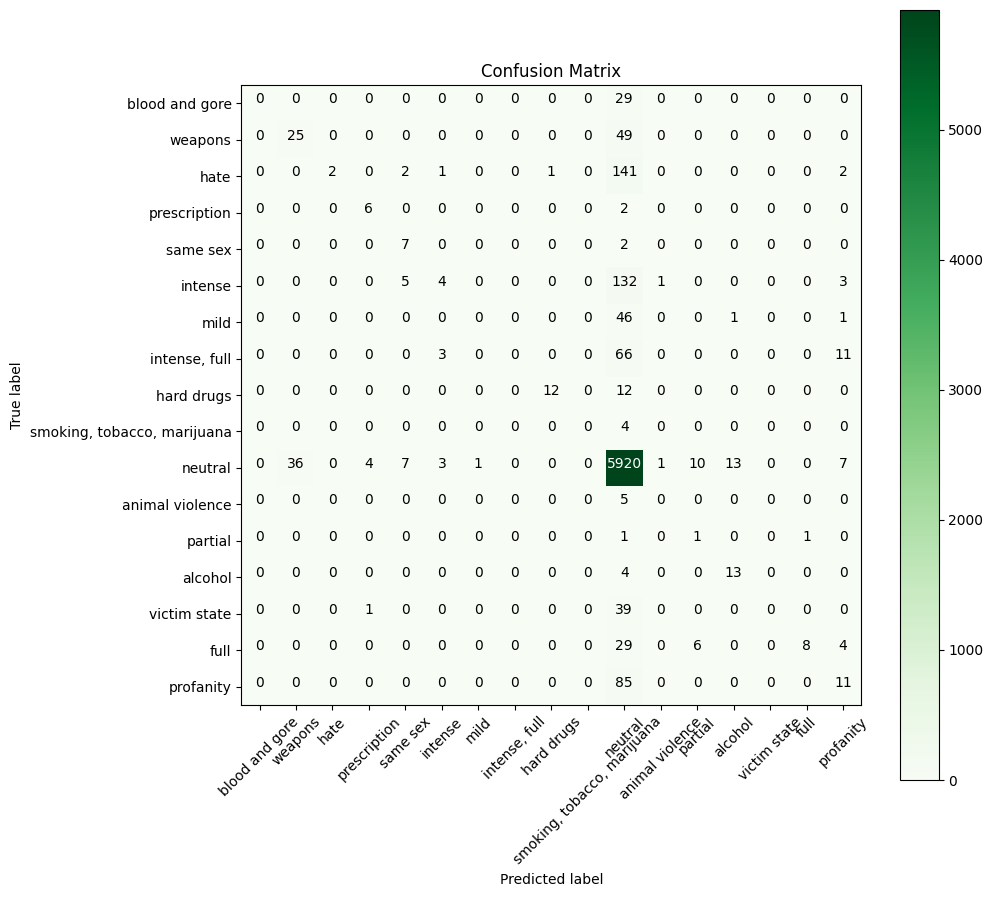

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

df = pd.read_csv("/content/gdrive/My Drive/XX/status70.csv")
# print(df["gtSubClassification"].unique())

# Example actual and predicted labels for multiclass classification
# actual_labels = df["gtClassification"]
# predicted_labels = df["classification"]

actual_labels = df["gtSubClassification"]
predicted_labels = df["subclassification"]
# print(set(actual_labels))
# print(set(predicted_labels))
# Create a confusion matrix
unique_labels = list(set(list(set(actual_labels)) + list(set(predicted_labels))))
# print(unique_labels)
cm = confusion_matrix(actual_labels, predicted_labels, labels=unique_labels)


# Function to plot the confusion matrix
# Function to plot the confusion matrix
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=unique_labels)
# plt.savefig("keywordSubClassCM.jpg")
plt.show()